In [1]:
words = open('names.txt').read().splitlines()

In [2]:
# let's only have one special token, and let's have it at index 0, offset others by 1
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
num_classes = len(stoi)

# Time to make a training set of all the bigrams

In [3]:
# create a training set of bigrams (x,y)

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

In [4]:
import torch

In [5]:
# beware of torch.tensor(autmatically guesses the dtype) vs. torch.Tensor(float dtype)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [6]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [7]:
# a common way of encoding integers is called one-hot encoding
# neural networks shouldn't take in integers, instead they should take float values
# pytorch has a built-in to one hot encode

In [8]:
import torch.nn.functional as F

In [9]:
xenc = F.one_hot(xs, num_classes=num_classes).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
xenc.shape, xenc.dtype

(torch.Size([5, 27]), torch.float32)

In [11]:
import matplotlib.pyplot as plt

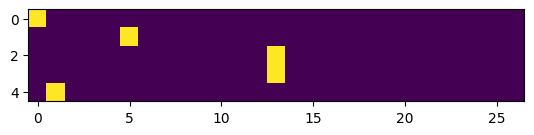

In [12]:
plt.imshow(xenc)

In [13]:
# lets initialise some random weights
W = torch.randn((num_classes, num_classes))
xenc.shape, W.shape

(torch.Size([5, 27]), torch.Size([27, 27]))

In [14]:
# (5, 27) @ (27, 27) -> (5, 27)
(xenc @ W).shape

torch.Size([5, 27])

In [15]:
# matrix multiplication is just efficient dot product in batches
(xenc @ W)[3,13], (xenc[3] * W[:, 13]).sum()

(tensor(-1.9482), tensor(-1.9482))

In [16]:
# we can't get probablities straight out of a NN, since they're supposed to sum to 1
# can't get counts either, since they're only positive and are integers, NN doesn't output that
# so instead we'll try to get interpret them as log(counts)
# to get the counts, we exponentiate the log(counts)

In [17]:
xenc @ W

tensor([[ 0.7288, -0.8358, -0.8506,  0.3732, -1.1215, -0.0884,  0.2791, -0.1276,
          0.9450, -0.4415, -0.6371, -1.7877, -0.6919, -0.6392, -0.0134, -0.9629,
          0.7049, -0.2726, -0.2014,  2.2627, -0.3677, -0.5461,  0.7511, -0.3949,
         -0.5900,  1.1008, -0.1745],
        [-0.5494,  2.4361, -0.7438,  1.0582,  0.5786, -0.4970, -1.2154, -1.5269,
          0.2947,  1.3360,  0.1178,  0.1353, -0.3573,  0.0139,  2.1762, -0.2512,
         -0.1329,  0.0729,  0.0994,  0.2169,  0.2958, -0.9179,  0.6608,  0.0218,
         -0.5126, -0.0279,  0.7855],
        [ 0.4982, -0.7476, -0.6848, -1.2135,  0.4826, -0.5418,  0.1298, -0.8656,
         -2.4303,  0.8201,  0.2404,  1.9400,  1.0601, -1.9482,  0.0371,  0.2539,
         -0.4406,  2.1144, -0.3692, -0.4772,  0.2471,  0.2653, -0.7836, -1.7515,
         -0.8024,  0.0436,  0.5737],
        [ 0.4982, -0.7476, -0.6848, -1.2135,  0.4826, -0.5418,  0.1298, -0.8656,
         -2.4303,  0.8201,  0.2404,  1.9400,  1.0601, -1.9482,  0.0371,  0.2539

In [18]:
(xenc @ W).exp()

tensor([[ 2.0726,  0.4335,  0.4271,  1.4523,  0.3258,  0.9154,  1.3220,  0.8802,
          2.5729,  0.6431,  0.5288,  0.1673,  0.5006,  0.5277,  0.9867,  0.3818,
          2.0236,  0.7614,  0.8176,  9.6086,  0.6923,  0.5792,  2.1193,  0.6737,
          0.5543,  3.0067,  0.8399],
        [ 0.5773, 11.4284,  0.4753,  2.8811,  1.7835,  0.6084,  0.2966,  0.2172,
          1.3428,  3.8038,  1.1250,  1.1449,  0.6995,  1.0140,  8.8132,  0.7779,
          0.8755,  1.0757,  1.1045,  1.2422,  1.3442,  0.3993,  1.9363,  1.0220,
          0.5990,  0.9725,  2.1935],
        [ 1.6457,  0.4735,  0.5042,  0.2972,  1.6203,  0.5817,  1.1386,  0.4208,
          0.0880,  2.2708,  1.2717,  6.9588,  2.8867,  0.1425,  1.0378,  1.2891,
          0.6437,  8.2850,  0.6913,  0.6205,  1.2803,  1.3038,  0.4568,  0.1735,
          0.4483,  1.0446,  1.7748],
        [ 1.6457,  0.4735,  0.5042,  0.2972,  1.6203,  0.5817,  1.1386,  0.4208,
          0.0880,  2.2708,  1.2717,  6.9588,  2.8867,  0.1425,  1.0378,  1.2891

In [19]:
logits = xenc @ W # interpret this as log counts, another word for these are logits
counts = logits.exp() # we get the counts, if you think of the bigram model, the counts of each bigram
probs = counts / counts.sum(1, keepdims=True) # once we have the counts, easy to get probabilities

In [20]:
probs

tensor([[0.0579, 0.0121, 0.0119, 0.0406, 0.0091, 0.0256, 0.0369, 0.0246, 0.0718,
         0.0180, 0.0148, 0.0047, 0.0140, 0.0147, 0.0276, 0.0107, 0.0565, 0.0213,
         0.0228, 0.2683, 0.0193, 0.0162, 0.0592, 0.0188, 0.0155, 0.0840, 0.0235],
        [0.0116, 0.2297, 0.0096, 0.0579, 0.0358, 0.0122, 0.0060, 0.0044, 0.0270,
         0.0765, 0.0226, 0.0230, 0.0141, 0.0204, 0.1771, 0.0156, 0.0176, 0.0216,
         0.0222, 0.0250, 0.0270, 0.0080, 0.0389, 0.0205, 0.0120, 0.0195, 0.0441],
        [0.0418, 0.0120, 0.0128, 0.0076, 0.0412, 0.0148, 0.0289, 0.0107, 0.0022,
         0.0577, 0.0323, 0.1768, 0.0734, 0.0036, 0.0264, 0.0328, 0.0164, 0.2105,
         0.0176, 0.0158, 0.0325, 0.0331, 0.0116, 0.0044, 0.0114, 0.0265, 0.0451],
        [0.0418, 0.0120, 0.0128, 0.0076, 0.0412, 0.0148, 0.0289, 0.0107, 0.0022,
         0.0577, 0.0323, 0.1768, 0.0734, 0.0036, 0.0264, 0.0328, 0.0164, 0.2105,
         0.0176, 0.0158, 0.0325, 0.0331, 0.0116, 0.0044, 0.0114, 0.0265, 0.0451],
        [0.0274, 0.0667,

In [21]:
probs.shape

torch.Size([5, 27])

In [22]:
torch.argmax(probs, dim=1)

tensor([19,  1, 17, 17, 11])

## Now let's do all of that without the noise

In [23]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

In [24]:
# Input dataset
xs = torch.tensor(xs)
# Labels
ys = torch.tensor(ys)

In [25]:
# Weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((num_classes, num_classes), generator=g)

In [26]:
# Forward pass
xenc = F.one_hot(xs, num_classes=num_classes).float()
logits = xenc @ W # interpret this as log counts, another word for these are logits
counts = logits.exp() # we get the counts, if you think of the bigram model, the counts of each bigram
probs = counts / counts.sum(1, keepdims=True) # once we have the counts, easy to get probabilities
# the last two lines are also together called as 'softmax'

In [27]:
probs.shape

torch.Size([5, 27])

## Let's now look into the quality of this untrained model

In [28]:
num_inputs = len(xs)

nlls = torch.zeros(num_inputs)
for i in range(num_inputs):
    x = xs[i].item()
    y = ys[i].item()
    print('---------------')
    print(f'bigram example {i}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print(f'input to neural net : {x}')
    print(f'output probablities from neural net : {probs[i]}')
    print(f'label (actual next character): {y}')
    p = probs[i, y]
    print(f'probablity assigned by the net to the correct character: {p.item()}')
    logp = torch.log(p)
    print(f'log likelihood: {logp.item()}')
    nll = -logp
    print(f'negative log likelihood: {nll.item()}')
    nlls[i] = nll
    
print('===============')
print(f'average negative log likelihood, i.e. loss = {nlls.mean().item()}')

---------------
bigram example 0: .e (indexes 0,5)
input to neural net : 0
output probablities from neural net : tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probablity assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
---------------
bigram example 1: em (indexes 5,13)
input to neural net : 5
output probablities from neural net : tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probablity assigned by the net to the correct character: 0.0180507004

In [29]:
# The loss function is differentiable
# W is tweakable
# gradient based optimisation to tweak W so as to minimize loss

In [30]:
torch.arange(5), ys

(tensor([0, 1, 2, 3, 4]), tensor([ 5, 13, 13,  1,  0]))

In [31]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [32]:
# pluck out the probs at the correct indices

In [33]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [34]:
# Weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((num_classes, num_classes), generator=g, requires_grad=True)

In [35]:
# Forward pass
xenc = F.one_hot(xs, num_classes=num_classes).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [36]:
# Backward pass
W.grad = None # set to zero
loss.backward()

In [37]:
W.shape, W.grad.shape

(torch.Size([27, 27]), torch.Size([27, 27]))

In [38]:
loss.item()

3.7693049907684326

In [39]:
# Update
lr = 0.1
W.data += -lr * W.grad

In [40]:
# Forward pass
xenc = F.one_hot(xs, num_classes=num_classes).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [41]:
loss.item()

3.7492127418518066

In [42]:
## Observe that the loss is going down